In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import gc

In [2]:
df_events = pd.read_parquet('data/add_event.parquet', engine="pyarrow")

In [3]:
df_events.head()

,id2,id3,id6,id4,id7
0,2431360,618619,Tiles,2023-10-22 08:08:17.768,None
1,2431360,363153,Tiles,2023-10-22 08:08:18.921,None
2,2431360,97193,Tiles,2023-10-22 08:08:17.765,None
3,2431360,654444,Tiles,2023-10-22 08:08:17.737,None
4,2431360,32325,Tiles,2023-10-22 08:08:17.812,None


In [4]:
df_offers = pd.read_parquet('data/offer_metadata.parquet', engine="pyarrow")

In [5]:
df_offers.head()

,id3,id9,f375,f376,f377,id10,id11,f378,f374,id8,id12,id13
0,70687,FO5O,2,5.0,None,1,None,N,None,None,2018-01-01 00:00:00,2099-12-31 23:59:59
1,900002526,UGE,2,100.0,None,1,None,N,None,None,2014-10-20 00:00:00,2099-12-31 23:59:59
2,900002864,UTP,1,100.0,None,1,None,N,None,None,2016-07-19 00:00:00,2099-12-31 23:59:59
3,19508,o,2,NaN,None,1,None,N,None,None,2019-06-02 17:00:00,2028-12-31 16:59:59
4,35903,o,2,NaN,None,1,None,N,None,None,2019-06-02 17:00:00,2028-12-31 16:59:59


In [6]:
df_train = pd.read_parquet('data/train_data.parquet', engine="pyarrow")

In [7]:
df_train.head()

,id1,id2,id3,id4,id5,y,f1,f2,f3,f4,...,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,1.0,None,None,None,...,None,-9999.0,0.0,None,28.0,0.0,0.0,337.0,0.0,0.0
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,1.0,None,None,None,...,None,None,0.0,None,87.0,0.0,0.0,1010.0,2.0,0.0019801980198019
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,1.0,None,None,None,...,None,None,0.0,None,23.0,0.0,0.0,1010.0,2.0,0.0019801980198019
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,1.0,None,None,None,...,None,-9999.0,0.0,None,277.0,1.0,0.003610108303249,337.0,0.0,0.0
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,1.0,None,None,None,...,None,-9999.0,0.0,None,359.0,0.0,0.0,337.0,0.0,0.0


In [8]:
df_dict = pd.read_csv('data/data_dictionary.csv')

In [9]:
df_dict.head()

,masked_column,Description,Type
0,id1,Primary Key(masked),Key
1,id2,Customer ID (masked),-
2,id3,Offer ID,Categorical
3,id4,Event timestamp,Numerical
4,id5,Event Date,Numerical


In [10]:
df_test = pd.read_parquet('data/test_data.parquet', engine="pyarrow")

In [11]:
df_test.head()

,id1,id2,id3,id4,id5,f1,f2,f3,f4,f5,...,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366
46756,1362907_91950_16-23_2023-11-04 18:56:26.000794,1362907,91950,2023-11-04 18:56:26.000794,2023-11-04,None,None,None,None,None,...,0.0027807272790246,0.0465999838670646,0.0,None,1.0,0.0,0.0,56.0,0.0,0.0
57819,1082599_88356_16-23_2023-11-04 06:08:53.373,1082599,88356,2023-11-04 06:08:53.373,2023-11-04,None,9.0,None,None,None,...,0.0014287946777398,0.0603093514970909,0.0,None,195.0,13.0,0.0666666666666666,None,None,None
15390,1888466_958700_16-23_2023-11-05 10:07:28.000725,1888466,958700,2023-11-05 10:07:28.000725,2023-11-05,None,None,None,None,22.0,...,-0.0174961119751166,0.0734836702954899,0.0,None,155.0,67.0,0.432258064516129,1142.0,436.0,0.3817863397548161
145730,1888971_795739_16-23_2023-11-04 12:25:28.244,1888971,795739,2023-11-04 12:25:28.244,2023-11-04,None,None,None,None,None,...,0.0013159476327096,0.040572039549215,0.0,None,None,None,None,None,None,None
146085,1256369_82296_16-23_2023-11-05 06:45:26.657,1256369,82296,2023-11-05 06:45:26.657,2023-11-05,None,None,None,None,None,...,0.0020541699799278,0.038243539079214,0.0,None,29.0,2.0,0.0689655172413793,361.0,3.0,0.0083102493074792


In [12]:
df_train['id4'] = pd.to_datetime(df_train['id4'])
df_test['id4'] = pd.to_datetime(df_test['id4'])
df_train['id5'] = pd.to_datetime(df_train['id5'])
df_test['id5'] = pd.to_datetime(df_test['id5'])

In [13]:
df_offers['id13'] = pd.to_datetime(df_offers['id13'])  # End Timestamp
df_offers['id12'] = pd.to_datetime(df_offers['id12'])  # Start Timestamp

In [14]:
df_train['id3'] = df_train['id3'].astype(str)
df_offers['id3'] = df_offers['id3'].astype(str)

In [15]:
df_train = df_train.merge(df_offers[['id3', 'id12', 'id13']], on='id3', how='left')
df_test = df_test.merge(df_offers[['id3', 'id12', 'id13']], on='id3', how='left')


In [16]:
df_train['is_offer_active'] = ((df_train['id4'] >= df_train['id12']) & (df_train['id4'] <= df_train['id13'])).astype(int)
df_test['is_offer_active'] = ((df_test['id4'] >= df_test['id12']) & (df_test['id4'] <= df_test['id13'])).astype(int)

In [17]:
df_train.drop(columns=['id4', 'id5', 'id12', 'id13'], inplace=True, errors='ignore')
df_test.drop(columns=['id12', 'id13'], inplace=True, errors='ignore')

In [18]:
df_events['id7'] = pd.to_datetime(df_events['id7'], errors='coerce')
df_events['is_clicked'] = df_events['id7'].notna().astype(int)

offer_ctr = df_events.groupby('id3').agg(
    impressions=('id4', 'count'),
    clicks=('is_clicked', 'sum'),
).reset_index()

offer_ctr['ctr'] = offer_ctr['clicks'] / offer_ctr['impressions']


In [19]:
df_offers['id3'] = df_offers['id3'].astype(str)
offer_ctr['id3'] = offer_ctr['id3'].astype(str)

# Merge CTR
df_offers = df_offers.merge(offer_ctr[['id3', 'ctr', 'impressions', 'clicks']], on='id3', how='left')

In [20]:
df_offers['f375'] = df_offers['f375'].astype(str)
df_events['id3'] = df_events['id3'].astype(str)

# Merge redemption frequency to events
df_events = df_events.merge(df_offers[['id3', 'f375']], on='id3', how='left')

# Group by redemption frequency
freq_ctr = df_events.groupby('f375').agg(
    freq_impressions=('id4', 'count'),
    freq_clicks=('is_clicked', 'sum')
).reset_index()
freq_ctr['freq_ctr'] = freq_ctr['freq_clicks'] / freq_ctr['freq_impressions']

# Merge into df_offers
df_offers = df_offers.merge(freq_ctr[['f375', 'freq_ctr']], on='f375', how='left')

In [21]:
df_offers['f376'] = pd.to_numeric(df_offers['f376'], errors='coerce')
df_offers['discount_bucket'] = pd.cut(df_offers['f376'], bins=[-1, 10, 30, 60, 100], labels=['low', 'mid', 'high', 'super'])

# Merge discount bucket into events
df_events = df_events.merge(df_offers[['id3', 'discount_bucket']], on='id3', how='left')

# CTR by discount bucket
bucket_ctr = df_events.groupby('discount_bucket').agg(
    bucket_clicks=('is_clicked', 'sum'),
    bucket_impressions=('id4', 'count')
).reset_index()
bucket_ctr['bucket_ctr'] = bucket_ctr['bucket_clicks'] / bucket_ctr['bucket_impressions']

df_offers = df_offers.merge(bucket_ctr[['discount_bucket', 'bucket_ctr']], on='discount_bucket', how='left')

C:\Users\91820\AppData\Local\Temp\ipykernel_5428\281921174.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_ctr = df_events.groupby('discount_bucket').agg(


In [22]:
df_offers_final = df_offers[['id3', 'ctr', 'impressions', 'clicks', 'freq_ctr', 'bucket_ctr']]

df_train = df_train.merge(df_offers_final, on='id3', how='left')
df_test = df_test.merge(df_offers_final, on='id3', how='left')

for col in ['ctr', 'impressions', 'clicks', 'freq_ctr', 'bucket_ctr']:
    df_train[col] = df_train[col].fillna(0)
    df_test[col] = df_test[col].fillna(0)

In [23]:
# 1. Define true numerical ranges (from earlier analysis)
good_ranges = (
    list(range(1, 13)) +           # interest scores
    list(range(13, 28)) +          # engagement counts
    list(range(28, 39)) +          # offer interactions
    list(range(59, 94)) +          # page time & ratios
    list(range(104, 123)) +        # CTRs
    list(range(130, 151)) +        # CTRs by category
    list(range(152, 198)) +        # Spend & transactions
    list(range(203, 224)) +        # Click/impression ratios
    list(range(310, 331)) +        # CTRs recent
    list(range(347, 348)) +        # avg ctr of offer
    list(range(350, 354)) +        # context & age functions
    list(range(358, 361)) +        # CTR decay + hardship
    list(range(361, 367))          # CTR history
)

f_cols_clean = [f"f{i}" for i in good_ranges]

# 2. Only convert those to numeric
df_train[f_cols_clean] = df_train[f_cols_clean].apply(pd.to_numeric, errors='coerce')
df_test[f_cols_clean] = df_test[f_cols_clean].apply(pd.to_numeric, errors='coerce')

In [24]:
f_cols = [f'f{i}' for i in range(1, 367)]

# Separate numeric and non-numeric
numeric_f = df_train[f_cols].select_dtypes(include=['number']).copy()
categorical_f = df_train[f_cols].select_dtypes(exclude=['number']).copy()

print(f"Numeric features: {numeric_f.shape[1]} | Categorical features: {categorical_f.shape[1]}")

Numeric features: 215 | Categorical features: 151


In [25]:
from sklearn.impute import SimpleImputer
numeric_f = numeric_f.dropna(axis=1, how='all')  # Drops cols with all NaN
num_imputer = SimpleImputer(strategy='median')
numeric_imputed = pd.DataFrame(
    num_imputer.fit_transform(numeric_f),
    columns=numeric_f.columns,
    index=numeric_f.index
)

# Impute categoricals
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_imputed = pd.DataFrame(
    cat_imputer.fit_transform(categorical_f),
    columns=categorical_f.columns,
    index=categorical_f.index
)

In [26]:
categorical_features = df_dict[df_dict['Type'].isin(['Categorical', 'One hot encoded'])]['masked_column'].tolist()
categorical_features = [col for col in categorical_features if (col in df_train.columns and col!= 'id3')]
print("Categorical features:")
print(categorical_features)

for col in categorical_features:
    if col in df_train.columns:
        df_train[col] = df_train[col].astype('category')
    if col in df_test.columns:
        df_test[col] = df_test[col].astype('category')

Categorical features:
['f42', 'f48', 'f50', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f241', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f258', 'f259', 'f260', 'f261', 'f262', 'f263', 'f264', 'f265', 'f266', 'f267', 'f268', 'f269', 'f270', 'f271', 'f272', 'f273', 'f274', 'f275', 'f276', 'f277', 'f278', 'f279', 'f280', 'f281', 'f282', 'f283', 'f284', 'f285', 'f286', 'f287', 'f288', 'f289', 'f290', 'f291', 'f292', 'f293', 'f294', 'f295', 'f296', 'f297', 'f298', 'f299', 'f300', 'f301', 'f302', 'f303', 'f304', 'f305', 'f306', 'f307', 'f308', 'f309', 'f349', 'f354']


In [27]:
from sklearn.preprocessing import OrdinalEncoder

# Only select the columns that exist in both train and test
valid_cats = [col for col in categorical_features if col in df_train.columns and col in df_test.columns]

# Convert to string to handle any mixed-type issues safely
df_train[valid_cats] = df_train[valid_cats].astype(str)
df_test[valid_cats] = df_test[valid_cats].astype(str)

# Use OrdinalEncoder with unknown handling
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df_train[valid_cats] = encoder.fit_transform(df_train[valid_cats])
df_test[valid_cats] = encoder.transform(df_test[valid_cats])


In [28]:
X = pd.concat([numeric_imputed], axis=1)
#add categorical fetures from x_train to X
for col in categorical_features:
    if col in df_train.columns:
        X[col] = df_train[col].astype('category')
X['id3'] = df_train['id3']


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=20, random_state=42)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=7, random_state=42, n_init='auto')
df_train['customer_cluster'] = kmeans.fit_predict(X_pca)


C:\Users\91820\AppData\Local\Temp\ipykernel_5428\3210796057.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['customer_cluster'] = kmeans.fit_predict(X_pca)


In [30]:
f_cols = [f'f{i}' for i in range(1, 367)]

# Separate numeric and non-numeric from df_test
numeric_f_test = df_test[f_cols].select_dtypes(include=['number']).copy()
categorical_f_test = df_test[f_cols].select_dtypes(exclude=['number']).copy()

print(f"Numeric features (test): {numeric_f_test.shape[1]} | Categorical features (test): {categorical_f_test.shape[1]}")

numeric_f_test = numeric_f_test[numeric_f.columns]

# Apply the already-fitted imputer
numeric_imputed_test = pd.DataFrame(
    num_imputer.transform(numeric_f_test),
    columns=numeric_f.columns,
    index=numeric_f_test.index
)

Numeric features (test): 310 | Categorical features (test): 56


In [31]:
# Start with numeric features for test set
X_test = pd.concat([numeric_imputed_test], axis=1)

# Add categorical features from df_test
for col in categorical_features:
    if col in df_test.columns:
        X_test[col] = df_test[col].astype('category')

# Add 'id3' from df_test
X_test['id3'] = df_test['id3']


In [32]:
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)
df_test['customer_cluster'] = kmeans.predict(X_test_pca)


C:\Users\91820\AppData\Local\Temp\ipykernel_5428\2396444239.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['customer_cluster'] = kmeans.predict(X_test_pca)


In [33]:
df_train.head()

,id1,id2,id3,y,f1,f2,f3,f4,f5,f6,...,f364,f365,f366,is_offer_active,ctr,impressions,clicks,freq_ctr,bucket_ctr,customer_cluster
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,0,1.0,NaN,NaN,NaN,NaN,NaN,...,337.0,0.0,0.00000,1,0.059875,18238.0,1092.0,0.021392,0.023355,6
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,0,1.0,NaN,NaN,NaN,NaN,NaN,...,1010.0,2.0,0.00198,1,0.046487,20780.0,966.0,0.021392,0.000000,5
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,0,1.0,NaN,NaN,NaN,NaN,NaN,...,1010.0,2.0,0.00198,1,0.041484,18296.0,759.0,0.021392,0.023355,5
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,0,1.0,NaN,NaN,NaN,NaN,NaN,...,337.0,0.0,0.00000,1,0.042805,18012.0,771.0,0.021392,0.023355,6
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,0,1.0,NaN,NaN,NaN,NaN,NaN,...,337.0,0.0,0.00000,1,0.042544,18428.0,784.0,0.021392,0.023355,6


In [34]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [35]:
for col in df_train.select_dtypes(include=['object']).columns:
    print(f"{col} unique values: {df_train[col].unique()}")
    #convert to float32
    if col != 'id1':
        df_train[col] = df_train[col].astype('float32')

id1 unique values: ['1366776_189706075_16-23_2023-11-02 22:22:00.042'
 '1366776_89227_16-23_2023-11-01 23:51:24.999'
 '1366776_35046_16-23_2023-11-01 00:30:59.797' ...
 '1896641_25212_16-23_2023-11-02 08:14:25.748'
 '1900765_95157_16-23_2023-11-02 06:08:25.900'
 '1901215_95807_16-23_2023-11-01 11:01:33.086']
id2 unique values: ['1366776' '1370198' '1372036' ... '1896641' '1900765' '1901215']
id3 unique values: ['189706075' '89227' '35046' '6275451' '78053' '31794' '664919' '481197'
 '78680' '960643' '156722' '97081' '9641813' '81251' '475056' '176404'
 '90250' '131332' '169639' '68777' '875283' '545624' '26185' '98922'
 '3745802' '94904' '32049' '82165' '2321' '760457' '851631' '88935'
 '863134' '486352' '762903' '783808' '510539' '67681' '6965175' '428865'
 '93192' '40583' '28868' '604959' '493091' '97904824' '69479' '56484'
 '204400' '401464' '795739' '187169' '874069' '82025' '5243695' '122403'
 '83469' '57086' '920925' '18473108' '367870583' '86311' '83023' '69026'
 '83102' '654444

In [36]:
cols_to_drop = []
for col in df_train.columns:
    unique_vals = df_train[col].dropna().unique()
    nunique = df_train[col].nunique(dropna=True)
    if nunique < 10:
        print(f"Column {col} : {unique_vals.tolist()} ")
    if nunique == 1 or set(unique_vals).issubset({0.0}):
        cols_to_drop.append(col)
        print(f"Marking column {col} for drop")

df_train.drop(columns=cols_to_drop, inplace=True)
df_test.drop(columns=cols_to_drop, inplace=True)

print(f"Dropped {len(cols_to_drop)} columns")
print(f"Df_train shape: {df_train.shape}")

Column y : [0.0, 1.0] 
Column f13 : [3.0, 4.0, 1.0, 5.0, 2.0, 6.0, 9.0] 
Column f14 : [0.0] 
Marking column f14 for drop
Column f15 : [0.0] 
Marking column f15 for drop
Column f16 : [0.0] 
Marking column f16 for drop
Column f17 : [0.0] 
Marking column f17 for drop
Column f18 : [1.0, 0.0] 
Column f19 : [0.0] 
Marking column f19 for drop
Column f20 : [0.0] 
Marking column f20 for drop
Column f21 : [0.0] 
Marking column f21 for drop
Column f23 : [0.0] 
Marking column f23 for drop
Column f24 : [0.0] 
Marking column f24 for drop
Column f25 : [0.0] 
Marking column f25 for drop
Column f34 : [1.0, 4.0, 2.0, 3.0, 7.0] 
Column f42 : [4.0, 2.0, 0.0, 1.0, 3.0] 
Column f48 : [4.0, 3.0, 2.0, 1.0, 0.0] 
Column f50 : [2.0, 1.0, 0.0] 
Column f52 : [2.0, 0.0, 1.0] 
Column f53 : [2.0, 1.0, 0.0] 
Column f54 : [6.0, 5.0, 0.0, 3.0, 4.0, 2.0, 1.0] 
Column f56 : [4.0, 2.0, 0.0, 3.0, 1.0] 
Column f57 : [4.0, 1.0, 2.0, 0.0, 3.0] 
Column f62 : [0.0] 
Marking column f62 for drop
Column f66 : [0.0] 
Marking column

In [37]:
#convert all float64 to float32
for col in df_train.select_dtypes(include=['float64']).columns:
    df_train[col] = df_train[col].astype('float32')
    if col in df_test.columns:
        df_test[col] = df_test[col].astype('float32')
    

In [38]:
# Drop unwanted columns
drop_cols = ['id1', 'id4', 'id5', 'y'] if 'id4' in df_train.columns else ['id1', 'id5', 'y']
features = df_train.drop(columns=drop_cols, errors='ignore').columns

# Split for local validation (optional but useful)
X_train, X_val, y_train, y_val = train_test_split(
    df_train[features], df_train['y'], test_size=0.2, random_state=42, stratify=df_train['y']
)


In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 616131 entries, 454341 to 551619
Columns: 348 entries, id2 to customer_cluster
dtypes: float32(345), int32(2), int64(1)
memory usage: 825.0 MB


In [40]:
y_train = pd.to_numeric(y_train, errors='coerce').fillna(0).astype(int)
y_val = pd.to_numeric(y_val, errors='coerce').fillna(0).astype(int)

In [43]:
import tensorflow as tf
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


This is the attention like mechanism to predict the offers

In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model, Input

# ─── 1) PARAMETERS ────────────────────────────────────────────────────────────
K = 50          # max offers per customer
D = len(features)  # number of features per offer
BATCH = 64
EPOCHS = 10

# ─── 2) PREP DATA: group into (num_customers, K, D) arrays ────────────────────
groups = []
labels = []

for cust_id, grp in df_train.groupby('id2'):
    X = grp[features].values   # shape (n_offers, D)
    y = grp['y'].values            # shape (n_offers,)
    # truncate or pad to length K
    if len(X) >= K:
        Xp = X[:K]
        yp = y[:K]
        mask = np.ones(K, dtype='float32')
    else:
        pad = np.zeros((K - len(X), D), dtype='float32')
        Xp = np.vstack([X, pad])
        yp = np.concatenate([y, np.zeros(K - len(X), dtype='float32')])
        mask = np.concatenate([np.ones(len(X),dtype='float32'),
                               np.zeros(K-len(X),dtype='float32')])
    groups.append((Xp, mask))
    labels.append(yp)

# Convert to Tensors
X_data = np.stack([g[0] for g in groups], axis=0)           # (N, K, D)
mask_data = np.stack([g[1] for g in groups], axis=0)        # (N, K)
y_data = np.stack(labels, axis=0)                            # (N, K)

# Build tf.data Dataset
ds = tf.data.Dataset.from_tensor_slices(((X_data, mask_data), y_data))
ds = ds.shuffle(1024).batch(BATCH).prefetch(2)

: 

In [ ]:
# ─── 3) MODEL DEFINITION ─────────────────────────────────────────────────────
# Inputs
feat_in = Input(shape=(K, D), dtype='float32', name='features')
mask_in = Input(shape=(K,), dtype='float32', name='mask')   # 1=valid, 0=padded

# Positional encoding (simple learned)
pos_emb = layers.Embedding(input_dim=K, output_dim=32)(tf.range(start=0, limit=K))
x = layers.Dense(64, activation='relu')(feat_in)            # project to 64 dims
x = x + pos_emb                                             # add pos info

# Transformer encoder stack
for _ in range(2):
    # Self‑attention
    attn_out = layers.MultiHeadAttention(num_heads=4, key_dim=64)(
        query=x, value=x, key=x, attention_mask=tf.expand_dims(mask_in,1)
    )
    x = layers.LayerNormalization()(x + attn_out)
    # Feed‑forward
    ff = layers.Dense(64, activation='relu')(x)
    x  = layers.LayerNormalization()(x + ff)

# Scoring head: one score per offer
scores = layers.Dense(1)(x)         # (batch, K, 1)
scores = tf.squeeze(scores, axis=-1)  # (batch, K)

# Mask out padded positions
scores = scores * mask_in

model = Model(inputs=[feat_in, mask_in], outputs=scores)

In [ ]:
# ─── 4) PAIRWISE RANKING LOSS ─────────────────────────────────────────────────
def pairwise_loss(y_true, y_pred):
    # y_true, y_pred: (batch, K)
    # gather clicked vs non-clicked pairs
    y_true_flat = tf.reshape(y_true, [-1])
    y_pred_flat = tf.reshape(y_pred, [-1])
    # mask out padded
    mask_flat   = tf.reshape(mask_batch,[-1])
    # a simple approximation: encourage clicked > unclicked
    clicked = tf.boolean_mask(y_pred_flat, y_true_flat>0.5)
    notcl   = tf.boolean_mask(y_pred_flat, y_true_flat<0.5)
    # pairwise diffs
    diffs = tf.expand_dims(notcl,1) - tf.expand_dims(clicked,0)
    # logistic loss
    return tf.reduce_mean(tf.nn.softplus(diffs))

model.compile(optimizer='adam', loss=pairwise_loss)


In [ ]:
# ─── 5) TRAIN ─────────────────────────────────────────────────────────────────
model.fit(ds, epochs=EPOCHS)

# ─── 6) INFERENCE ─────────────────────────────────────────────────────────────
# Build test dataset in the same way to get Xt, mask_t
# Then:
scores_test = model.predict([X_test, mask_test])  # (num_customers, K)
# Flatten back into one row per offer, sort per customer & create submission…

# This is the LightGBM Ranking model


In [42]:
# ── TRAINING & SUBMISSION PIPELINE ───────────────────────────────────────────

import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# 1) Filter to valid customers
def filter_valid(df, gid='id2', label='y', min_offers=2):
    grp = df.groupby(gid)
    valid = grp.filter(lambda g: g[label].sum()>0 and len(g)>=min_offers)[gid].unique()
    return df[df[gid].isin(valid)].reset_index(drop=True)

df_train = filter_valid(df_train, 'id2', 'y', 2)

# 2) Split by customer
df_train = df_train.sort_values('id2').reset_index(drop=True)
custs = df_train['id2'].unique()
np.random.seed(42)
np.random.shuffle(custs)
cut = int(len(custs)*0.2)
val_c, trn_c = custs[:cut], custs[cut:]

df_tr = df_train[df_train['id2'].isin(trn_c)].copy()
df_va = df_train[df_train['id2'].isin(val_c)].copy()

# 3) Build feature list
drop_cols = ['id1','id2','id3','id5','y']
features = [c for c in df_train.columns if c not in drop_cols]

X_tr, y_tr = df_tr[features], df_tr['y']
X_va, y_va = df_va[features], df_va['y']
group_tr = df_tr.groupby('id2').size().tolist()
group_va = df_va.groupby('id2').size().tolist()

dtrain = lgb.Dataset(X_tr, label=y_tr, group=group_tr, categorical_feature='auto')
dvalid = lgb.Dataset(X_va, label=y_va, group=group_va, categorical_feature='auto')


# # 6) Inference & submission
# X_te = df_test[features]
# raw = model.predict(X_te, num_iteration=model.best_iteration)
# df_test['pred_raw'] = raw

# # Min–max scale to [0,1]
# mn,mx = raw.min(), raw.max()
# df_test['pred'] = (raw - mn) / (mx - mn)

# # Format date and sort
# df_test['id5'] = pd.to_datetime(df_test['id5']).dt.strftime('%-m/%-d/%Y')
# df_test = df_test.sort_values(['id2','pred'], ascending=[True,False])

# # If only top‑7 per customer (and per date, if needed):
# # df_test = df_test.groupby(['id2','id5']).head(7)

# submission = df_test[['id1','id2','id3','id5','pred']].reset_index(drop=True)
# submission.to_csv('submission.csv', index=False)
# print("✅ submission.csv written.")


[LightGBM] [Info] Total groups: 3958, total data: 346405
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 45810
[LightGBM] [Info] Number of data points in the train set: 346405, number of used features: 309
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 198 dense feature groups (66.07 MB) transferred to GPU in 0.071443 secs. 1 sparse feature groups
[LightGBM] [Info] Total groups: 989, total data: 82566
Training until validation scores don't improve for 100 rounds
[50]	training's map@7: 0.532567	valid_1's map@7: 0.453663
[100]	training's map@7: 0.588139	valid_1's map@7: 0.461073
[150]	training's map@7: 0.633001	valid_1's map@7: 0.459861
[200]	training's map@7: 0.675604	valid_1's map@7: 0.45791

In [44]:

# 4) Train lambdarank
params = {
    'objective':'lambdarank','metric':'map','eval_at':[7],
    'boosting_type':'gbdt','learning_rate':0.048,'num_leaves':64,
    'feature_fraction':0.8,'bagging_fraction':0.8,'bagging_freq':5,
    'device_type':'gpu','gpu_platform_id':1,'gpu_device_id':0,
    'random_state':44,'verbosity':1
}

model = lgb.train(
    params, dtrain,
    valid_sets=[dtrain,dvalid],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(100), lgb.log_evaluation(50)]
)

# 5) Quick val MAP@7
def apk(a,p,k=7):
    p=p[:k]; score=hits=0.0
    for i,pi in enumerate(p):
        if pi in a and pi not in p[:i]:
            hits+=1; score+=hits/(i+1)
    return score/min(len(a),k) if a else 0.0

def map7(df, pr='pred'):
    out=[]
    for cid,grp in df.groupby('id2'):
        act = grp[grp['y']==1]['id3'].tolist()
        prd = grp.sort_values(pr,ascending=False)['id3'].tolist()
        out.append(apk(act,prd,7))
    return np.mean(out)

df_va['pred'] = model.predict(X_va, num_iteration=model.best_iteration)
print("Validation MAP@7:", map7(df_va))

[LightGBM] [Info] Total groups: 3958, total data: 346405
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 45810
[LightGBM] [Info] Number of data points in the train set: 346405, number of used features: 309
[LightGBM] [Info] Using requested OpenCL platform 1 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070 Ti Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 198 dense feature groups (66.07 MB) transferred to GPU in 0.056537 secs. 1 sparse feature groups
[LightGBM] [Info] Total groups: 989, total data: 82566
Training until validation scores don't improve for 100 rounds
[50]	training's map@7: 0.530705	valid_1's map@7: 0.457641
[100]	training's map@7: 0.585044	valid_1's map@7: 0.462965
[150]	training's map@7: 0.631496	valid_1's map@7: 0.46367
[200]	training's map@7: 0.673074	valid_1's m

# This is older ranking model


In [88]:
def filter_valid_ranking_groups(df, group_col='id2', label_col='y', min_offers=2):
    """
    Keeps only those groups (e.g., customers) that:
    - Have at least one positive click
    - Have at least `min_offers` offers
    """
    grouped = df.groupby(group_col)
    valid_groups = grouped.filter(
        lambda g: g[label_col].sum() > 0 and len(g) >= min_offers
    )[group_col].unique()

    return df[df[group_col].isin(valid_groups)].reset_index(drop=True)

df_train = filter_valid_ranking_groups(df_train)
df_train.shape

(428971, 350)

In [89]:
df_train = df_train.sort_values('id2').reset_index(drop=True)

customers = df_train['id2'].unique()
np.random.seed(42)
np.random.shuffle(customers)

val_fraction = 0.2
val_cutoff = int(len(customers) * val_fraction)

val_customers = customers[:val_cutoff]
train_customers = customers[val_cutoff:]

df_train_split = df_train[df_train['id2'].isin(train_customers)].copy()
df_val_split = df_train[df_train['id2'].isin(val_customers)].copy()

In [90]:
common_elements = set(df_train_split['id2']) & set(df_val_split['id2'])
print("✅ Common elements in column 'col':")
print(common_elements)

✅ Common elements in column 'col':
set()


In [91]:
# Drop ID columns and label
drop_cols = ['id1', 'id2', 'y']
feature_cols = [col for col in df_train.columns if col not in drop_cols]

X_train = df_train_split[feature_cols]
y_train = df_train_split['y']
group_train = df_train_split.groupby('id2').size().tolist()

X_val = df_val_split[feature_cols]
y_val = df_val_split['y']
group_val = df_val_split.groupby('id2').size().tolist()

In [92]:
train_data = lgb.Dataset(X_train, label=y_train, group=group_train)
val_data = lgb.Dataset(X_val, label=y_val, group=group_val)

In [43]:
import pyopencl as cl

for i, platform in enumerate(cl.get_platforms()):
    print(f"Platform ID {i}: {platform.name}")
    for j, device in enumerate(platform.get_devices()):
        print(f"  Device ID {j}: {device.name} (Vendor: {device.vendor})")


Platform ID 0: Intel(R) OpenCL Graphics
  Device ID 0: Intel(R) UHD Graphics (Vendor: Intel(R) Corporation)
Platform ID 1: NVIDIA CUDA
  Device ID 0: NVIDIA GeForce RTX 3070 Ti Laptop GPU (Vendor: NVIDIA Corporation)
Platform ID 2: OpenCLOn12
  Device ID 0: Intel(R) UHD Graphics (Vendor: Microsoft)
  Device ID 1: NVIDIA GeForce RTX 3070 Ti Laptop GPU (Vendor: Microsoft)
  Device ID 2: Microsoft Basic Render Driver (Vendor: Microsoft)


In [98]:
params = {
    'objective': 'lambdarank',
    'metric': 'map',
    'boosting_type': 'gbdt',
    'verbosity': 1,
    'random_state': 44,
    'learning_rate': 0.048,
    'num_leaves': 64,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    # 'lambda_l2': 0.02,
    'device_type': 'gpu',
    'gpu_platform_id': 0,
    'gpu_device_id': 0, 
    # 'max_position': 7,
    'eval_at': [7]
}
params_gpu = params.copy()
# params_gpu['device'] = 'gpu'
params_gpu['gpu_platform_id'] = 0  
params_gpu['gpu_device_id'] = 0  
model = lgb.train(
    params_gpu,
    train_data,
    valid_sets=[train_data, val_data],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=100),
        lgb.log_evaluation(period=50)
    ]
)


[LightGBM] [Info] Total groups: 3958, total data: 346405
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 46043
[LightGBM] [Info] Number of data points in the train set: 346405, number of used features: 310
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070 Ti Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 199 dense feature groups (66.07 MB) transferred to GPU in 0.059127 secs. 1 sparse feature groups
[LightGBM] [Info] Total groups: 989, total data: 82566
Training until validation scores don't improve for 100 rounds
[50]	training's map@7: 0.533747	valid_1's map@7: 0.453052
[100]	training's map@7: 0.588787	valid_1's map@7: 0.463242
[150]	training's map@7: 0.632714	valid_1's map@7: 0.462383
[200]	training's map@7: 0.67912	valid_1's m

In [99]:
df_val_split['pred'] = model.predict(X_val)


def apk(actual, predicted, k=7):
    if len(predicted) > k:
        predicted = predicted[:k]
    score = 0.0
    hits = 0
    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            hits += 1
            score += hits / (i + 1.0)
    return score / min(len(actual), k) if actual else 0.0

def mapk(df):
    actual = df[df['y'] == 1].groupby('id2')['id3'].apply(list)
    predicted = df.groupby('id2')['id3'].apply(
        lambda x: df.loc[x.index].sort_values('pred', ascending=False)['id3'].tolist()
    )
    actual = actual.reindex(predicted.index, fill_value=[])
    return np.mean([apk(a, p, k=7) for a, p in zip(actual, predicted)])

map7 = mapk(df_val_split)
print(f"\n📊 Validation MAP@7: {map7:.4f}")


📊 Validation MAP@7: 0.4680


In [63]:
##Jo abtak tweaks kre hai woh wala model


params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'verbosity': 1,
    'random_state': 42,
    'learning_rate': 0.05,
    'num_leaves': 64,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    # 'lambda_l1': 0.05,
    'device_type': 'gpu',
    'is_unbalanced' : True  
}
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    num_boost_round=2000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=50)
    ]
)

[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Info] Number of positive: 29692, number of negative: 316713
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 46009
[LightGBM] [Info] Number of data points in the train set: 346405, number of used features: 310
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070 Ti Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 199 dense feature groups (66.07 MB) transferred to GPU in 0.062542 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085715 -> initscore=-2.367118
[LightGBM] [Info] Start training from score -2.367118
Training until validation scores don't improve for 50 rounds
[50]	training's binary_lo

In [61]:
##Original submission wala model

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'verbosity': -1,
    'random_state': 42,
    'learning_rate': 0.05,
    'num_leaves': 64,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5
}


model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=50)
    ]
)

Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.133927	valid_1's binary_logloss: 0.170079
[100]	training's binary_logloss: 0.117548	valid_1's binary_logloss: 0.165474
[150]	training's binary_logloss: 0.108764	valid_1's binary_logloss: 0.165154
Early stopping, best iteration is:
[135]	training's binary_logloss: 0.111126	valid_1's binary_logloss: 0.165105


In [ ]:
df_val_split['pred'] = model.predict(X_val, num_iteration=model.best_iteration)

map7_scores = []
for cust_id, group in df_val_split.groupby('id2'):
    pred_offers = group.sort_values('pred', ascending=False)['id3'].tolist()
    actual_y = group[group['y'] == 1]['id3'].tolist()
    map7_scores.append(mapk([actual_y], [pred_offers]))

print(f"\n📊 Binary Classifier MAP@7: {np.mean(map7_scores):.4f}")


In [43]:

# # 1. Extract test features
# drop_cols_test = ['id1', 'id4', 'id5', 'y'] if 'id4' in df_test.columns else ['id1', 'id5']
# features_test = [c for c in df_test.columns if c not in drop_cols_test]
# X_test = df_test[features_test]

# # 2. Apply the same imputer and PCA
# X_test_imp = imp.transform(X_test)
# X_test_pca = pca.transform(X_test_imp)

# # 3. Predict probabilities
# df_test['click_proba'] = stack_clf.predict_proba(X_test_pca)[:, 1]
# df_test['pred'] = df_test['click_proba']

# # 4. Format `id5`
# df_test['id5'] = pd.to_datetime(df_test['id5']).dt.strftime('%-m/%-d/%Y')

# # 5. Create final submission
# final = (
#     df_test
#     .sort_values(['id2', 'id5'])  # Optional sort
#     [['id1', 'id2', 'id3', 'id5', 'pred']]
#     .reset_index(drop=True)
# )

# # 6. Save to CSV
# final.to_csv("submission.csv", index=False)
# print("Submission saved as 'submission.csv'")


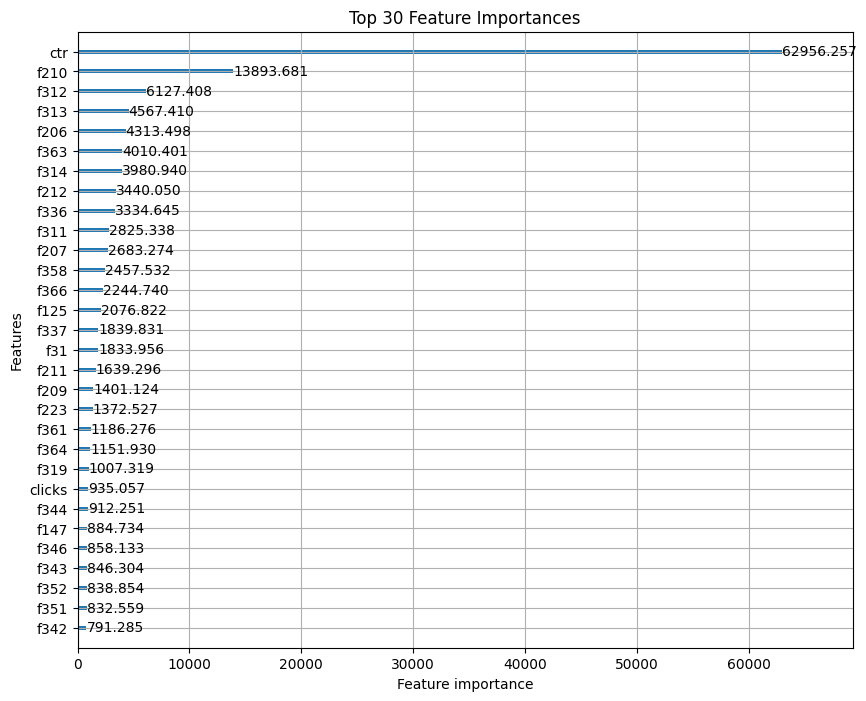

In [121]:
import matplotlib.pyplot as plt
import lightgbm as lgb

# Plot feature importance

lgb.plot_importance(model, max_num_features=30, importance_type='gain', figsize=(10, 8))
plt.title("Top 30 Feature Importances")
plt.show()


In [101]:
df_test[features] = df_test[features].apply(pd.to_numeric, errors='coerce')
df_test[features] = df_test[features].fillna(-9999)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369301 entries, 0 to 369300
Columns: 351 entries, id1 to customer_cluster
dtypes: datetime64[ns](2), float32(197), float64(146), int32(2), int64(3), object(1)
memory usage: 708.6+ MB


In [118]:
for col in df_test.select_dtypes(include=['float64']).columns:
    df_test[col] = df_test[col].astype('float32')

In [119]:

# Use the same feature list as training
X_test = df_test[feature_cols]  # Same `feature_cols` used in training

# ------------------------
# Step 2: Predict click probabilities
# ------------------------

df_test['click_proba'] = model.predict(X_test, num_iteration=model.best_iteration)
df_test['pred'] = df_test['click_proba']  # Optional renaming

# ------------------------
# Step 3: Format date if needed (id5)
# ------------------------

df_test['id5'] = pd.to_datetime(df_test['id5']).dt.strftime('%-m/%-d/%Y')  # Unix -> M/D/YYYY

# ------------------------
# Step 4: Build submission
# ------------------------

# For MAP@7-style prediction, you often want to sort offers by predicted score per customer
df_test_sorted = (
    df_test
    .sort_values(['id2', 'pred'], ascending=[True, False])  # Sort offers by score within each customer
)

# Optional: if top-7 matters, group and take top 7 per customer
# top7 = df_test_sorted.groupby('id2').head(7)

# Final submission format
submission = df_test_sorted[['id1', 'id2', 'id3', 'id5', 'pred']].reset_index(drop=True)

# ------------------------
# Step 5: Save to CSV
# ------------------------

submission.to_csv('submission.csv', index=False)
print("✅ Submission saved to 'submission.csv'")


C:\Users\91820\AppData\Local\Temp\ipykernel_18064\232225426.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['click_proba'] = model.predict(X_test, num_iteration=model.best_iteration)
C:\Users\91820\AppData\Local\Temp\ipykernel_18064\232225426.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['pred'] = df_test['click_proba']  # Optional renaming


✅ Submission saved to 'submission.csv'


In [120]:
submission['pred'] = 1.0 / (1.0 + np.exp(-submission['pred']))

# Now all values in submission['pred'] are between 0 and 1
# Feel free to save:
submission.to_csv('submission.csv', index=False)
print("✅ Sigmoid applied; probabilities are now in [0,1].")

✅ Sigmoid applied; probabilities are now in [0,1].
